In [1]:
#Import the file and assign Cdelt and CritVal

import astropy
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

hdulist = fits.open('apStar-dr17-2M08105145+3218246.fits')

spectra_hdu = hdulist[1]

crval = spectra_hdu.header['CRVAL1']
cdelt = spectra_hdu.header['CDELT1']

print(crval)
print(cdelt)

spectra_data = spectra_hdu.data

4.179
6e-06


In [2]:
#Wavelength Function and to-CSV

startwave = 10**crval
space = 10**cdelt
nwave = np.arange(8575)
def waves():
    nwave2 = startwave * (space**(nwave+1))
    return nwave2

wavelengs = waves()
#wavelengs.shape
#wavelengs

In [4]:
#Spectra 1 information
visit_one_data = spectra_data[5,:]
visit_one_data

#Spectra 1 dataframe

df1 = pd.DataFrame({'flux':visit_one_data,'wavelengths':wavelengs})

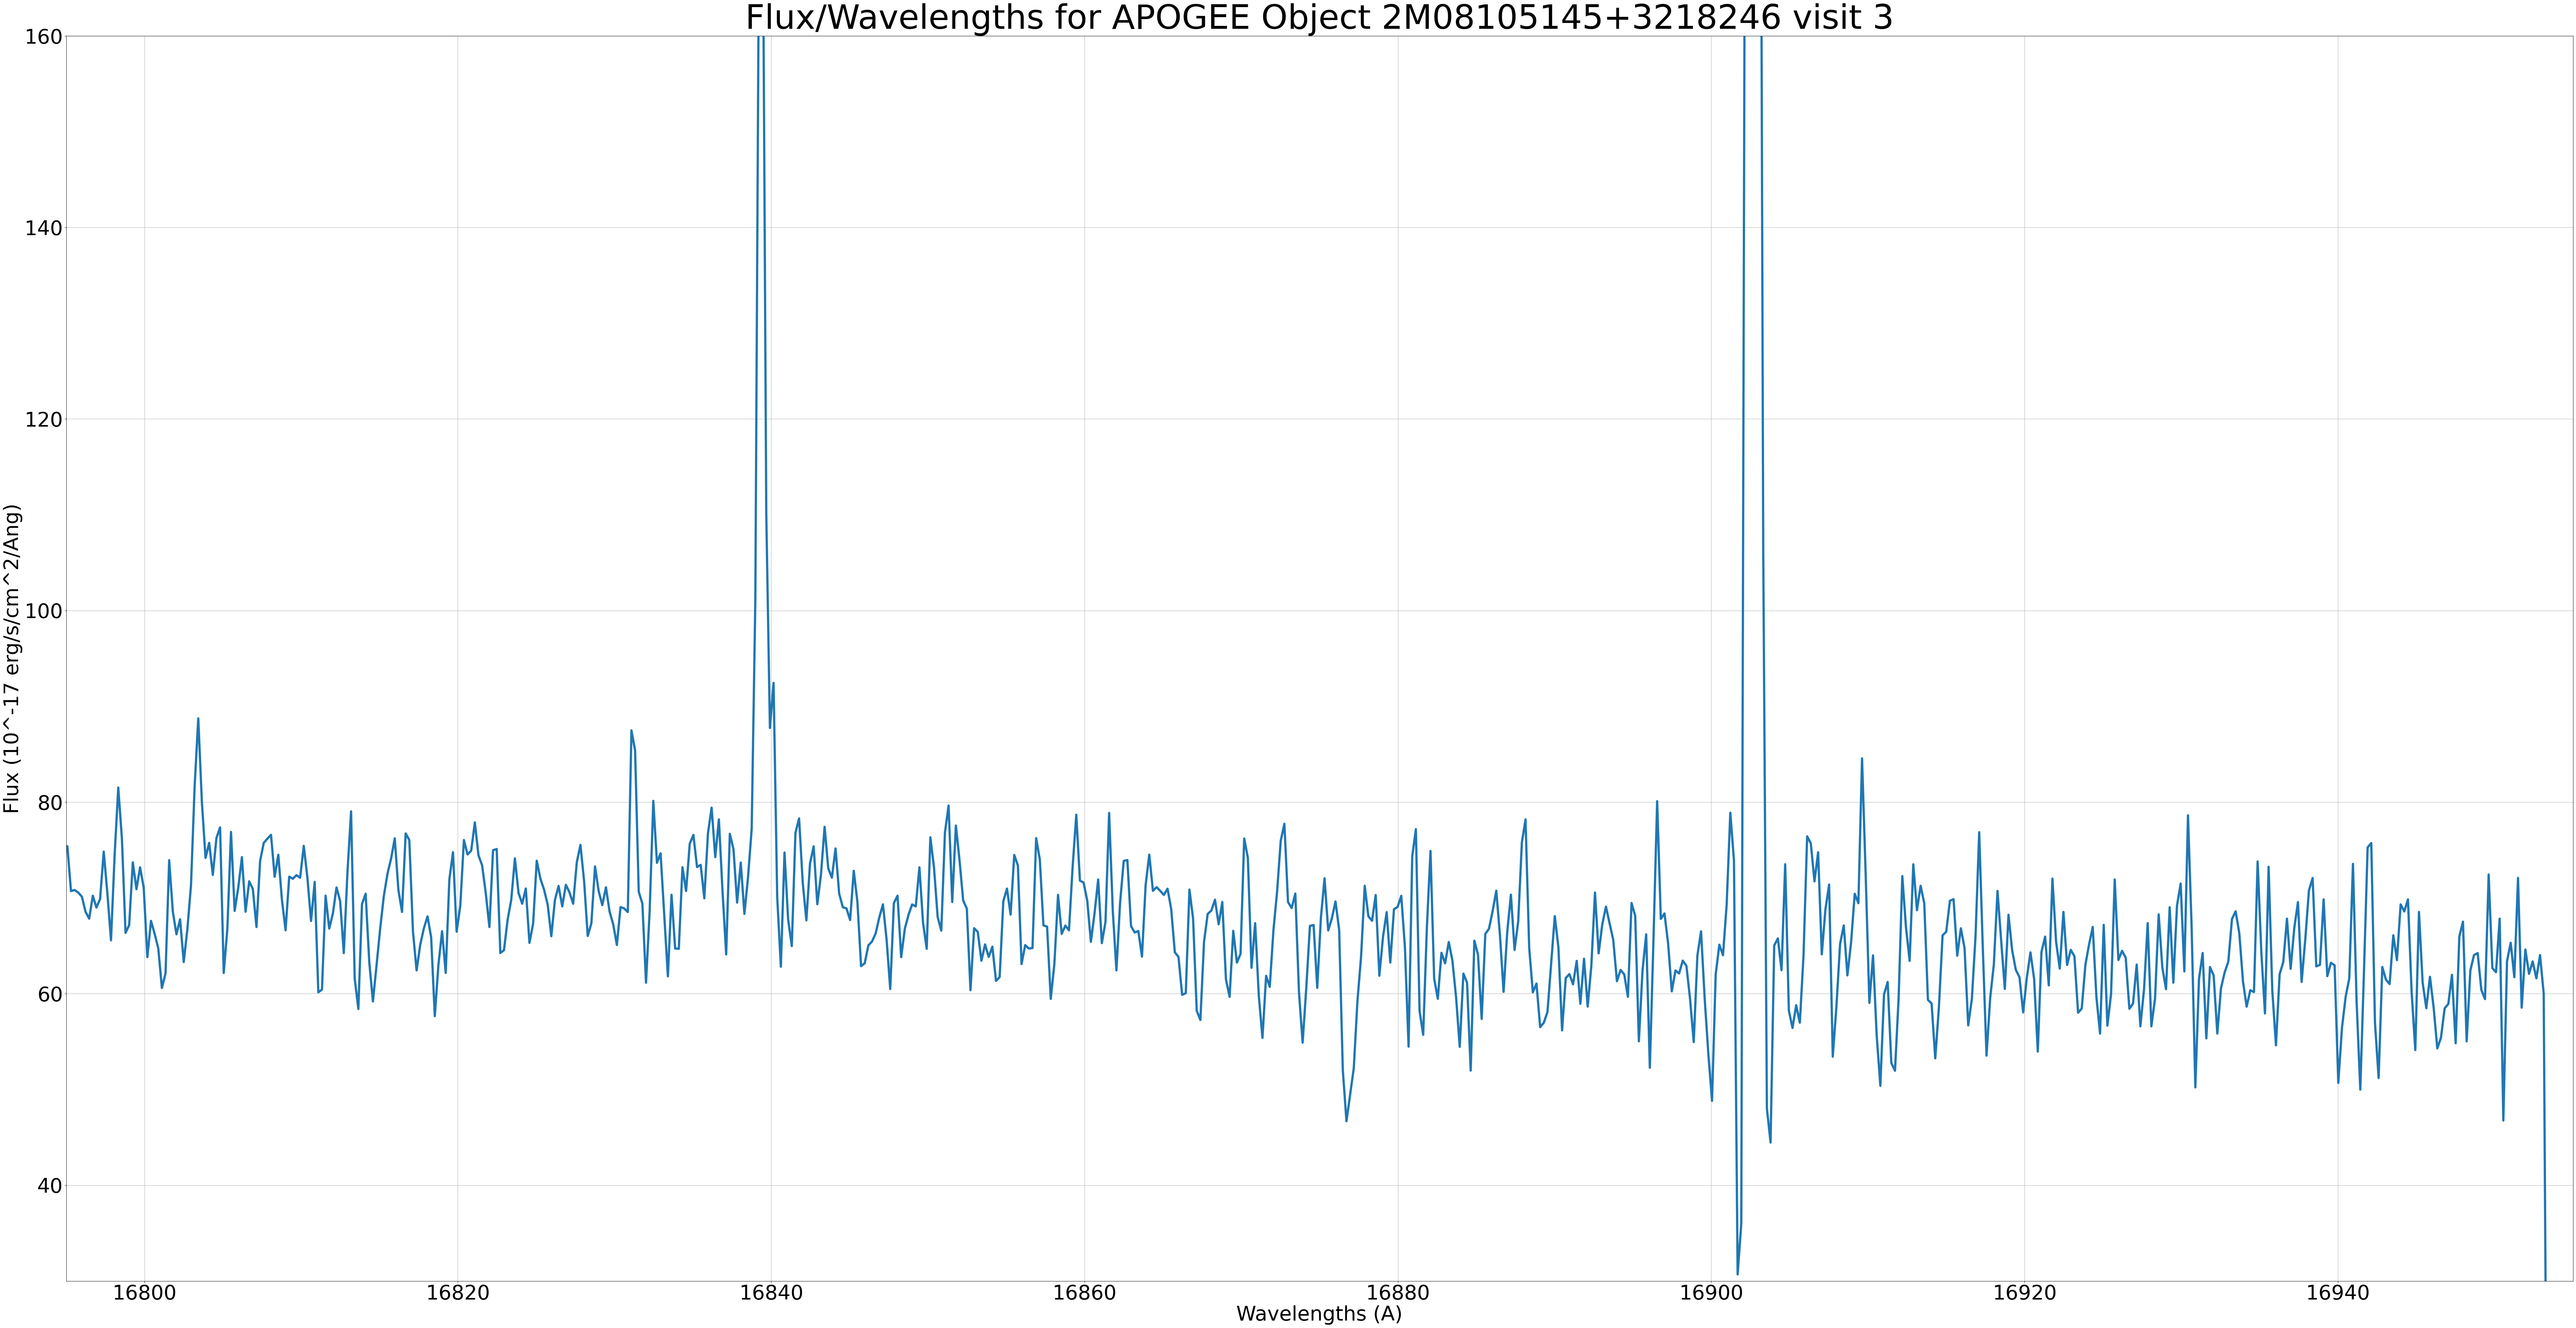

<Figure size 10000x5000 with 0 Axes>

In [20]:
#Plotting of Individual Spectra #1

matplotlib.rcParams.update({'font.size': 45})

plt.plot(df1.wavelengths, df1.flux,linewidth = 5)
plt.title('Flux/Wavelengths for APOGEE Object 2M08105145+3218246 visit 3', fontsize = 75)
plt.xlim([16795,16955])
plt.ylim([30,160])
plt.xlabel('Wavelengths (A)')
plt.ylabel('Flux (10^-17 erg/s/cm^2/Ang)')
plt.rcParams["figure.figsize"] = (100,50)
plt.grid()
plt.show()
plt.savefig('object_2M08105145+3218246.png')

In [ ]:
df1.flux

In [ ]:
df1.wavelengths

In [ ]:
#Radial Velocity for visits

rvbin = hdulist[9]
rvbin.header

RV = rvbin.header['TTYPE5']
RVdata = rvbin.data[RV]

RVdata

In [ ]:
hdulist.info()

In [ ]:
hdulist[0].header